# Predicting Wine Quality using Wine Quality Dataset
It’s a well-established fact that age makes wine better – the older the wine, the better it will taste. However, age is not the only thing that determines a wine’s taste. Numerous factors determine the wine quality certification, including physicochemical tests such as alcohol quantity, fixed acidity, volatile acidity, density, and pH level, to name a few. In this ML project, you need to develop an ML model that can explore a wine’s chemical properties to predict its quality. The wine quality dataset you’ll be using for this project consists of approximately 4898 observations, including 11 independent variables and one dependent variable. Mentioning Machine Learning projects for the final year can help your resume look much more interesting than others.

### The requirements for the project are
Explain feature engineering Trying cross validation and Hyperparameters tuning will be a plus. Try at least 2 models and prepare the report with the performance comparison and reasoning why one is better than another.

### Our goals for this notebook:
<b>Part 1:</b> <i>Exploratory Data Analysis, Data wrangling and feature engineering</i>

<i>Exploratory Data Analysis: understand the data by EDA and derive simple models with Pandas as baseline</i>

<i>Data wrangling: fill nan, convert categorical to numerical, create train and test data for ML algorithms</i>

<b>Part 2:</b> <i>Scikit-learn basic ML algorithms implement different Classifiers from the sklearn library: Logistic regression, Gaussian naive Bayes, KNN, Decision tree, Random forest, SVM</i>

<b>Part 3:</b> <i>Comparison of Model results use metrics like confusion_matrix, classification_report, accuracy_score and implement k fold cross validation for comparison of test score</i>

# <span style="color:red"> Part 1: Exploratory Data Analysis, Data wrangling and feature engineering</span> 

### install modules

In [1]:
!pip install plotly
!pip install numpy
!pip install pandas
!pip install matplotlib

### Import modules that will be used in process

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.ensemble import ExtraTreesClassifier
%matplotlib inline

import plotly.express as px

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
warnings.simplefilter(action='ignore', category=FutureWarning)
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

### Import data set (csv)

### Show 5 random choosen rows OR first 5 rows from data set

In [3]:
df = pd.read_csv("winequalityN.csv")
df.sample(5)                   #shows 5 random choosen rows
#df.head(5)                    #shows first 5 rows from data set

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2528,white,6.4,0.16,0.37,1.5,0.037,27.0,109.0,0.99345,3.38,0.50,9.8,6
3963,white,6.0,0.34,0.32,3.8,0.044,13.0,116.0,0.99108,3.39,0.44,11.8,7
4389,white,6.3,0.28,0.22,9.5,0.040,30.0,111.0,0.99338,3.05,0.31,10.8,4
3217,white,5.8,0.33,0.23,5.0,0.053,29.0,106.0,0.99458,3.13,0.52,9.0,5
5740,red,10.6,0.50,0.45,2.6,0.119,34.0,68.0,0.99708,3.23,0.72,10.9,6


### Description for data set (Count of rows, mean, std, min, 25%, 50%, 75%, max for each coloumn)

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


###   Check if there are null elements in the data set

In [6]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In dataset some values for <b>fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, pH, sulphates</b> are missing. Solve this problem by filling null values with mean values.
### Fill Nan values by mean

In [7]:
df.fillna(df.mean(axis=0), inplace=True)
df.head(5)
# instead of
# df['fixed acidity'].fillna(df['fixed acidity'].mean(), inplace=True)
# df['volatile acidity'].fillna(df['volatile acidity'].mean(), inplace=True)
# df['citric acid'].fillna(df['citric acid'].mean(), inplace=True)
# df['residual sugar'].fillna(df['residual sugar'].mean(), inplace=True)
# df['chlorides'].fillna(df['chlorides'].mean(), inplace=True)
# df['pH'].fillna(df['pH'].mean(), inplace=True)
# df['sulphates'].fillna(df['sulphates'].mean(), inplace=True)
# df.head(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Check Nan elements again

In [8]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Visualizing the Data


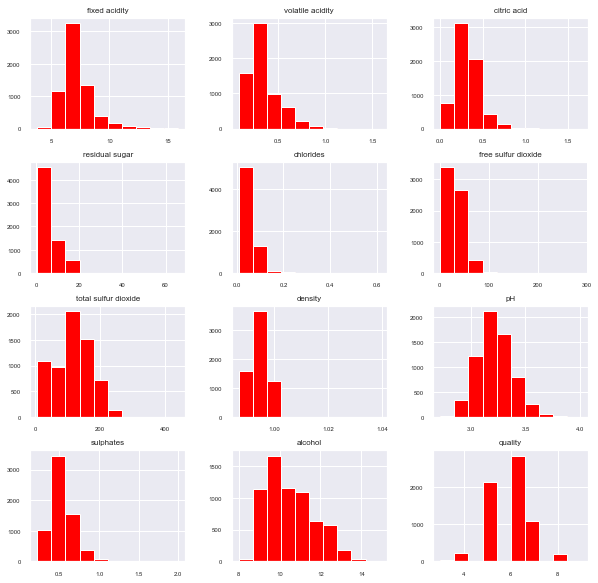

In [9]:
sns.set()
fig = df.hist(figsize=(10,10), color='red', xlabelsize=6, ylabelsize=6)
[x.title.set_size(8) for x in fig.ravel()]
plt.show()

### Find outliers

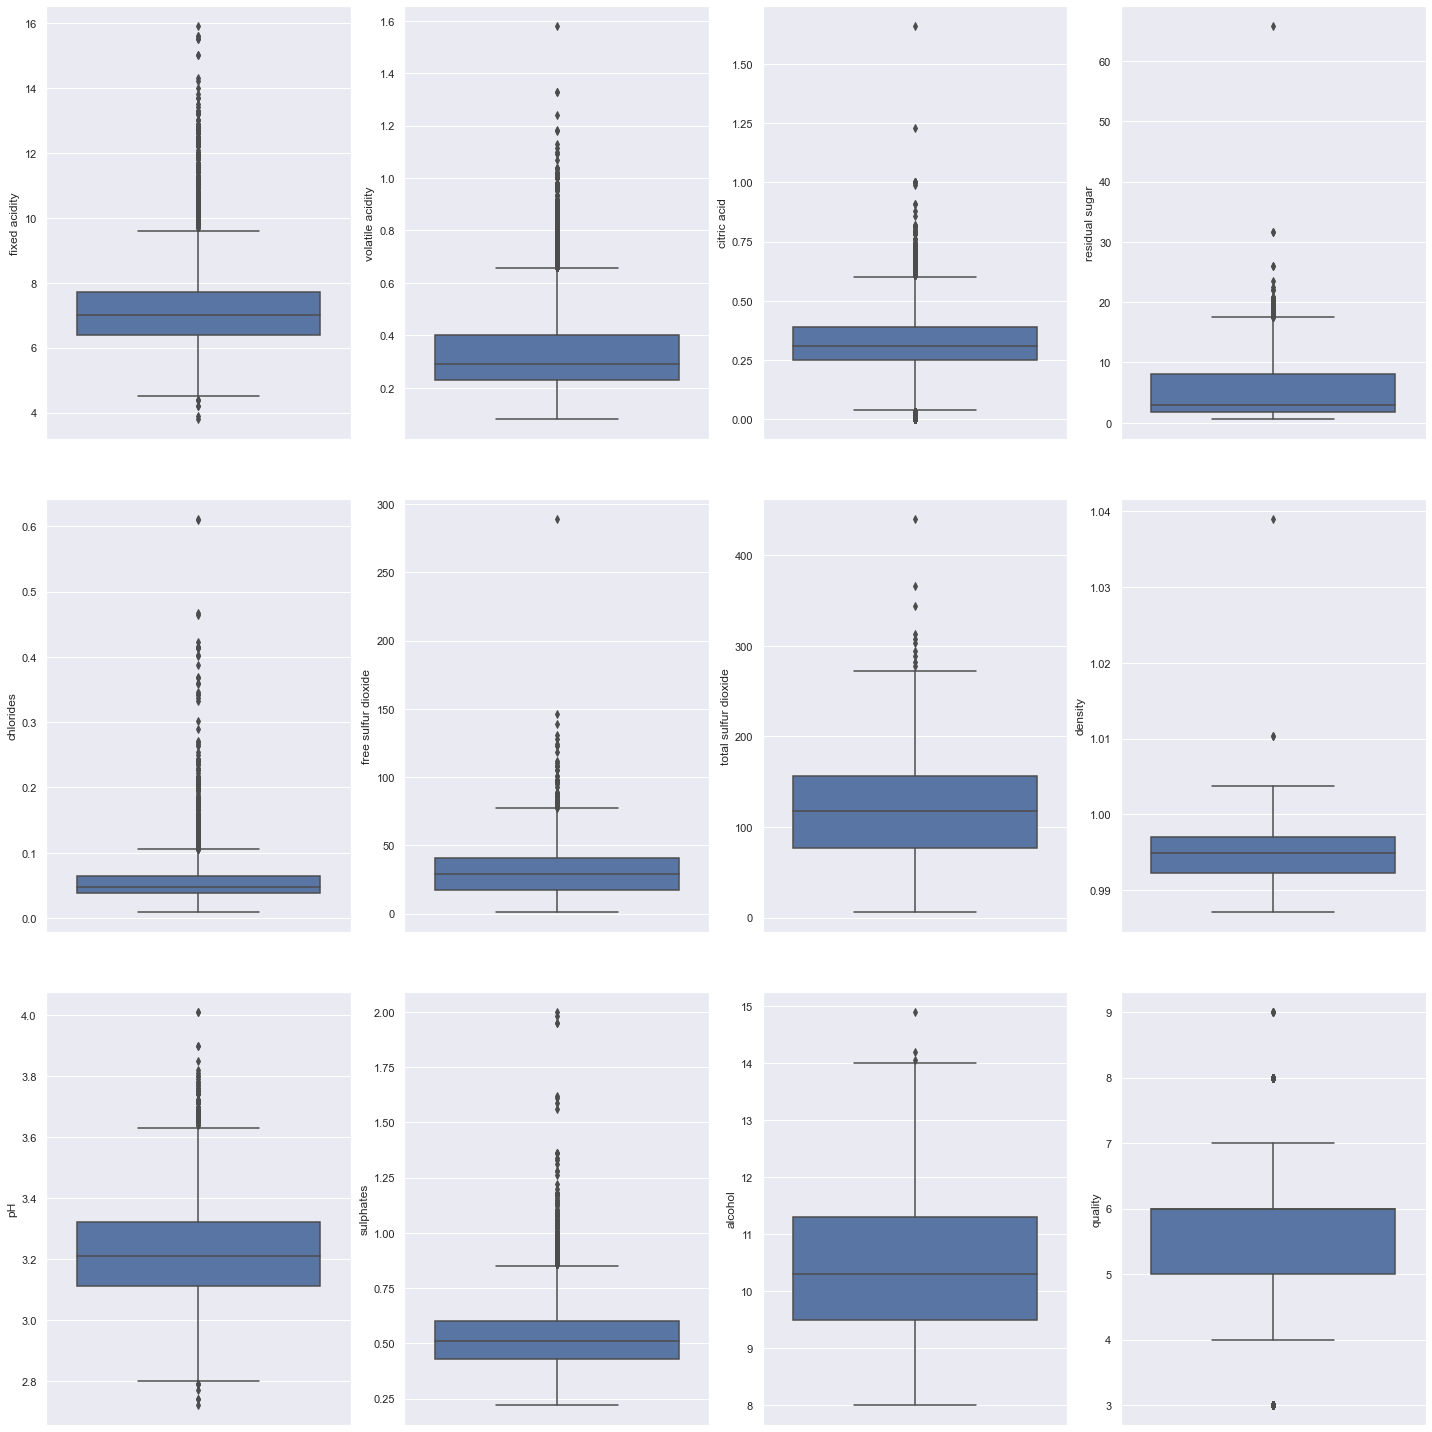

In [10]:
fig,ax = plt.subplots(ncols = 4, nrows = 3, figsize = (20, 20))
index = 0
ax = ax.flatten()
for column, value in df.items():
    if column != 'type':
        sns.boxplot(y = column, data = df, ax = ax[index])
        index += 1
plt.tight_layout(pad = 0.9, w_pad = 0.7, h_pad = 5.0)

### Check correlation between each feature and quality

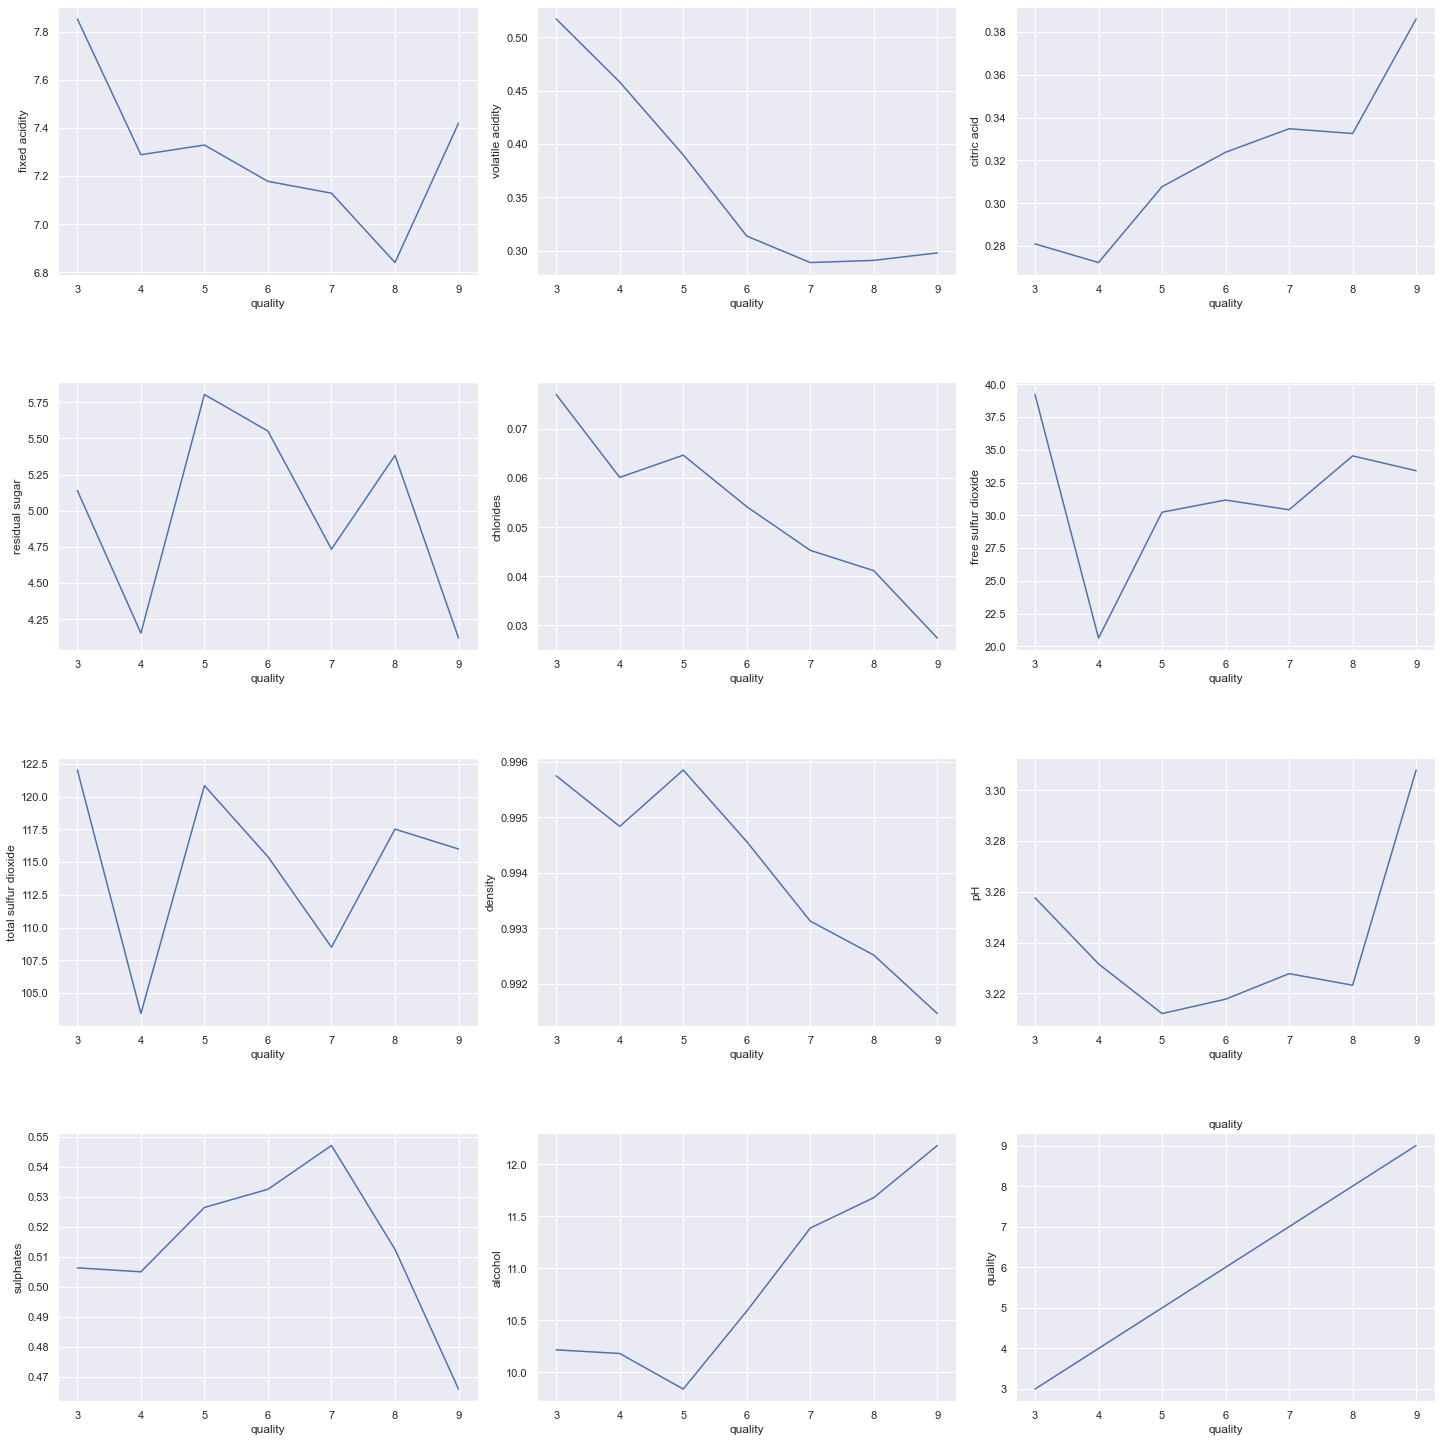

In [11]:
fig,ax = plt.subplots(ncols = 3, nrows = 4, figsize = (20, 20))
index = 0
ax = ax.flatten()
for column, value in df.items():
    if column != 'type':
        df.groupby('quality')[column].mean().plot.line(ax = ax[index], ylabel=column)
        #ax.set_ylabel(column)
        plt.ylabel(column)
        plt.title(column)
        index += 1
plt.tight_layout(pad = 0.5, w_pad = 0.7, h_pad = 5.0)

### Check the correlation matrix to see how different variables are correlated with each other

### First visualization

<AxesSubplot:>

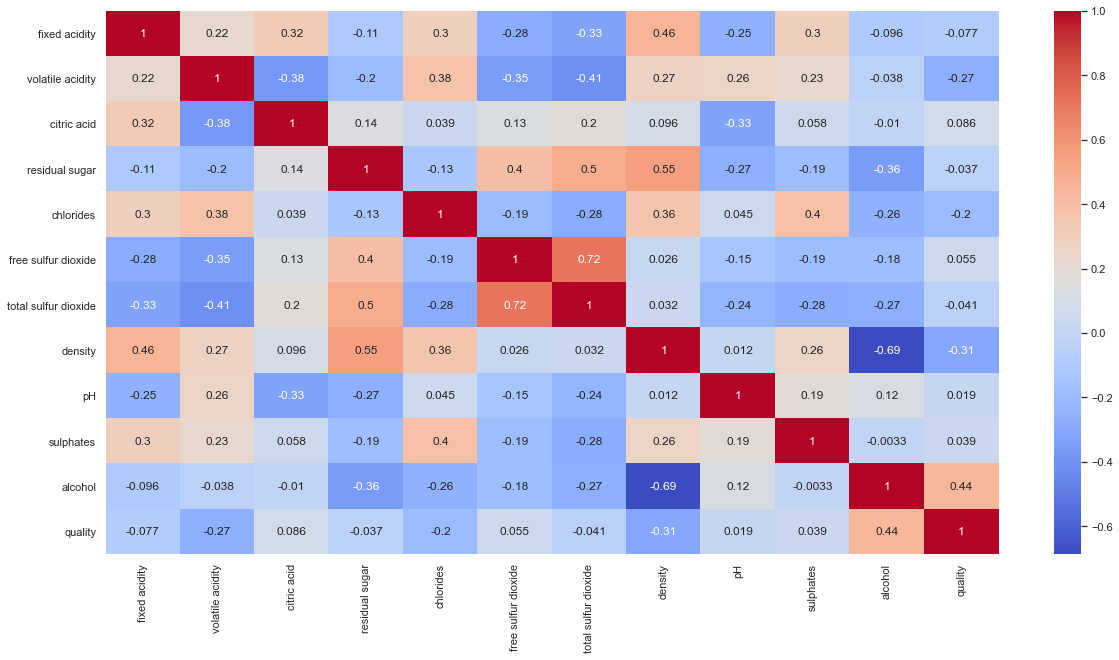

In [12]:
corr = df.corr()
plt.figure(figsize = (20, 10))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')

### Second visualization

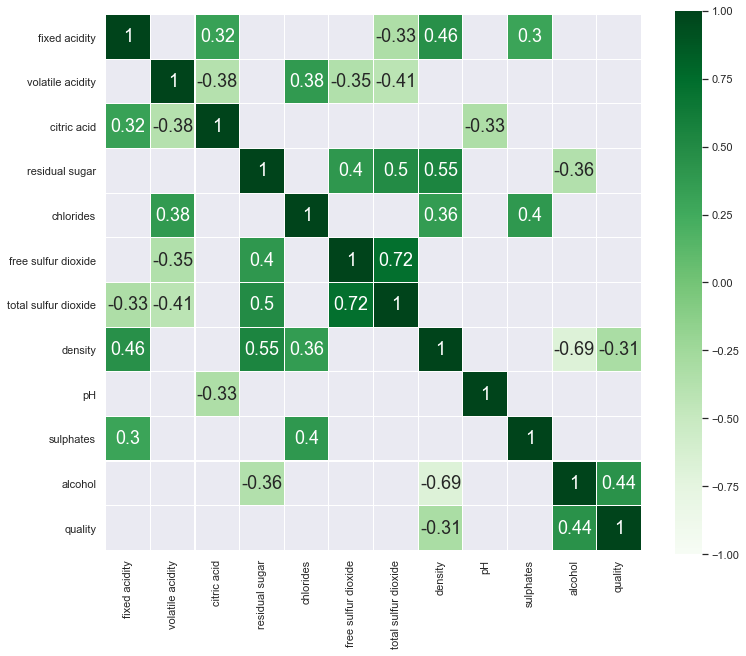

In [13]:
corr = df.corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.3) | (corr <= -0.3)], 
            cmap='Greens', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 18}, square=True);

### Check the unique values of quality variable

In [14]:
df.quality.unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

<AxesSubplot:xlabel='quality', ylabel='count'>

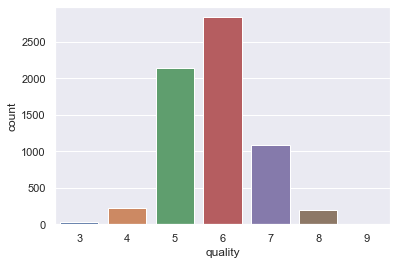

In [15]:
sns.countplot(x='quality', data=df)

### The correlation between quality and wine types

In [16]:
df.groupby(['quality', 'type'])['quality'].count()

quality  type 
3        red        10
         white      20
4        red        53
         white     163
5        red       681
         white    1457
6        red       638
         white    2198
7        red       199
         white     880
8        red        18
         white     175
9        white       5
Name: quality, dtype: int64

### share of white wines is 75%.

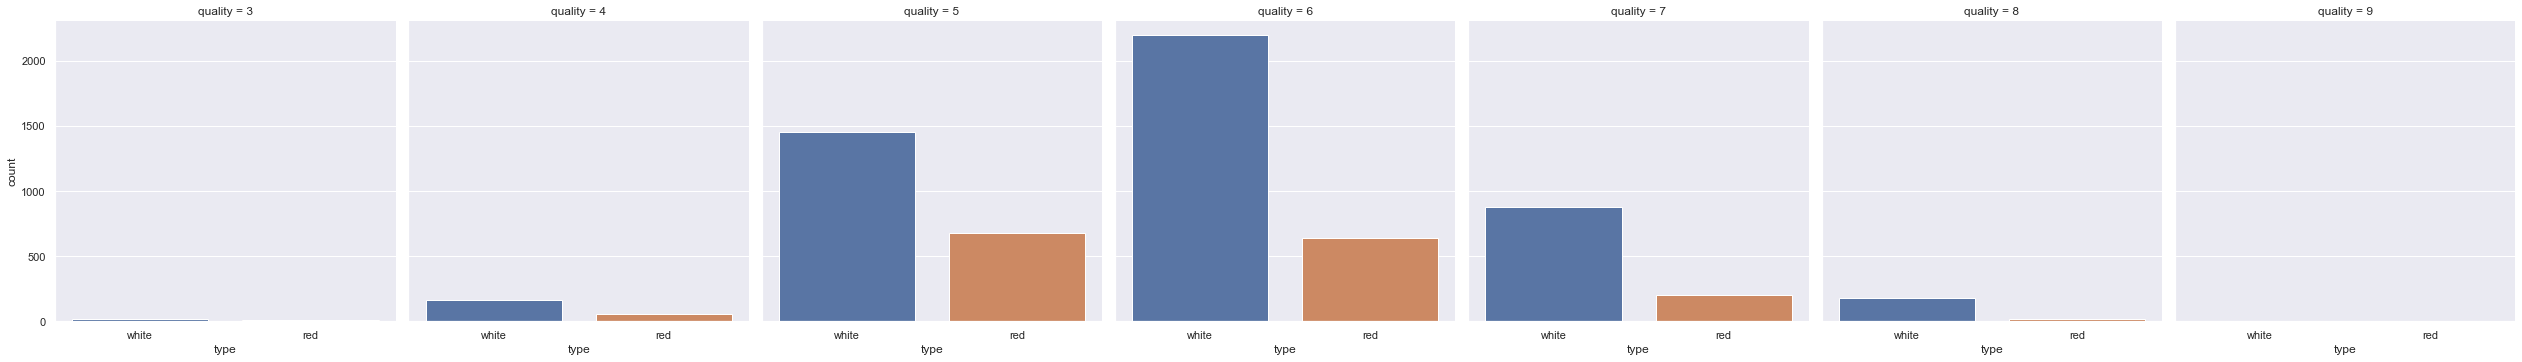

In [17]:
#plt.rcParams['figure.figsize'] = (25, 25)
sns.catplot(x='type', col='quality', kind='count', data=df);
# share of white wine types is quite higher than red wine types

In [18]:
pd.crosstab(df.type, df.quality, margins=True).style.background_gradient(cmap='autumn_r')

quality,3,4,5,6,7,8,9,All
type,,,,,,,,
red,10,53,681,638,199,18,0,1599
white,20,163,1457,2198,880,175,5,4898
All,30,216,2138,2836,1079,193,5,6497


In [19]:
m_white = df[df['type']=='white']['quality'].mean() 
# the same result: df.loc[(df['type']=='white'), 'quality'].mean() 
m_red = df[df['type']=='red']['quality'].mean()
print(f"Mean of white wine type's quality is: {m_white}")
print(f"Mean of red wine type's quality is: {m_red}")

Mean of white wine type's quality is: 5.87790935075541
Mean of red wine type's quality is: 5.6360225140712945


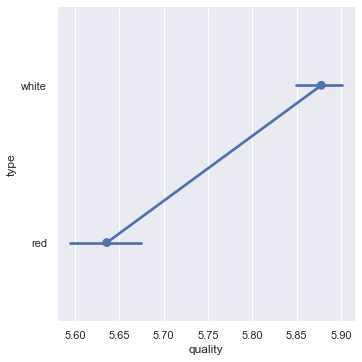

In [20]:
sns.catplot('quality', 'type', kind='point', data=df);

### It seems quality of white wines is higher than red

### Check relations between fixed acidity and quality

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

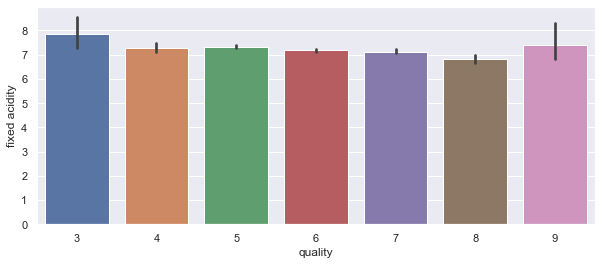

In [21]:
plt.figure(figsize=(10,4))
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)

there is no clear correelation trend between fixed acidity and quality

### Check relations between volatile acidity and quality

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

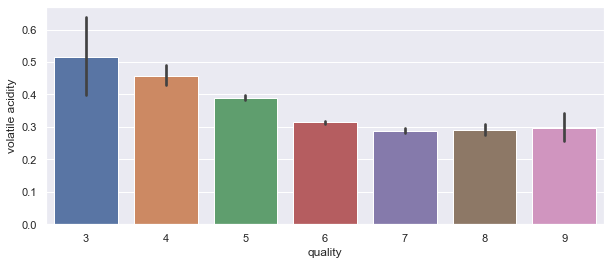

In [22]:
plt.figure(figsize=(10,4))
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

here we can see that the higher gets the quality the lower becomes volatile acidity, so there is a negative correlation between these variables

### Check relations between citric acid and quality

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

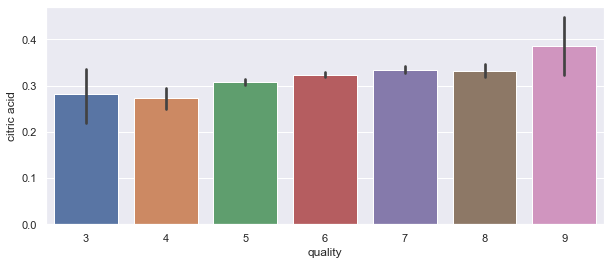

In [23]:
plt.figure(figsize=(10, 4))
sns.barplot(x="quality", y="citric acid",   data=df )

In case of citric acidity we can see the opposity: it is positively correlated with the quality

### Check relations between residual sugar and quality

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

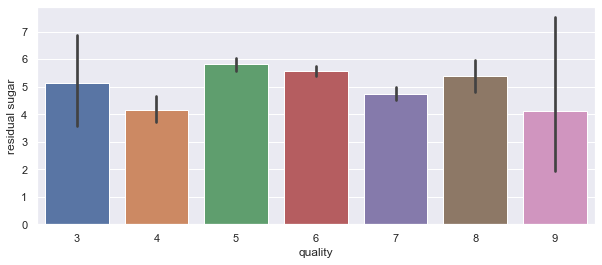

In [24]:
plt.figure(figsize=(10, 4))
sns.barplot(x="quality", y="residual sugar",   data=df )

the relationship between quality and residual sugar is unclear

### Check relation between chlorides and quality

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

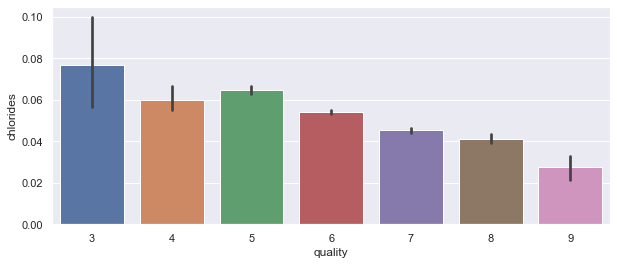

In [25]:
plt.figure(figsize=(10, 4))
sns.barplot(x="quality", y="chlorides",   data=df )

the quality of wine increases as chlorides go down

### Check relation between free sulfur dioxide and quality

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

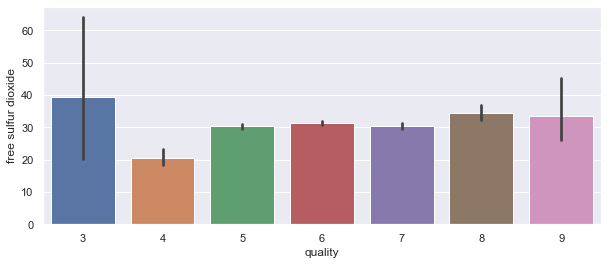

In [26]:
plt.figure(figsize=(10,4))
sns.barplot(x="quality", y="free sulfur dioxide",   data=df )

doesn't provide any insight

### Check relation between total sulfur dioxide and quality

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

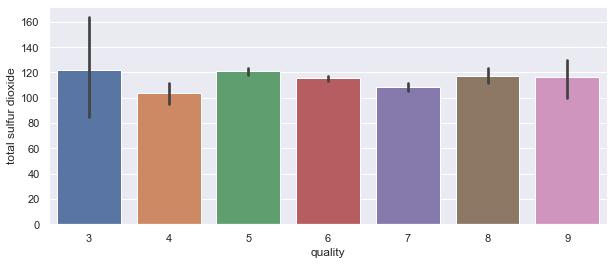

In [27]:
plt.figure(figsize=(10,4))
sns.barplot(x="quality", y="total sulfur dioxide",   data=df )

doesn't provide any insight

### Check relation between density and quality

<AxesSubplot:xlabel='quality', ylabel='density'>

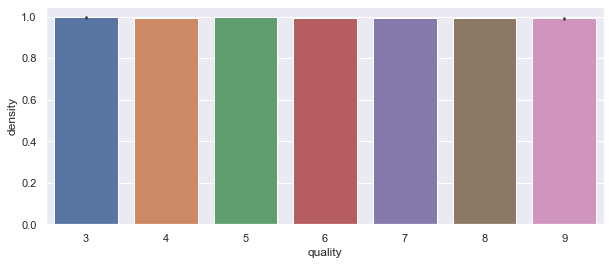

In [28]:
plt.figure(figsize=(10,4))
sns.barplot(x="quality", y="density",   data=df )

not useful

<AxesSubplot:xlabel='quality', ylabel='density'>

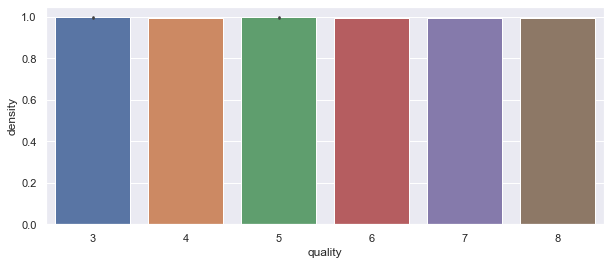

In [29]:
plt.figure(figsize=(10,4))
sns.barplot(x=df[df["type"]=="red"]["quality"], y=df[df["type"]=="red"]["density"],   data=df )

### Check relation between pH and quality

<AxesSubplot:xlabel='quality', ylabel='pH'>

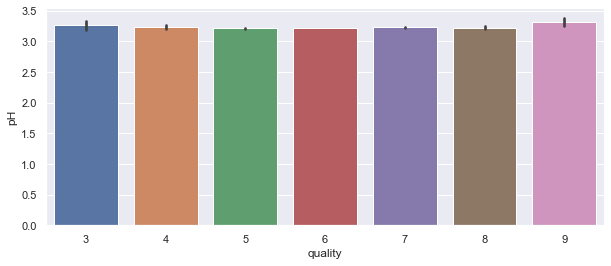

In [30]:
plt.figure(figsize=(10,4))
sns.barplot(x="quality", y="pH",   data=df )

It seems not useful, <b>but</b>

Text(0, 0.5, 'pH')

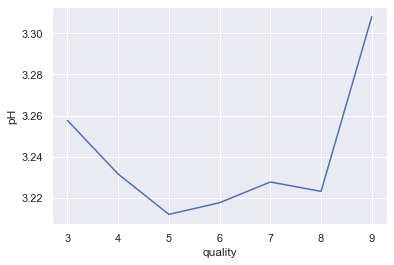

In [31]:
df.groupby('quality')['pH'].mean().plot.line()
plt.ylabel("pH")

But from this vizualization we can see that pH and quality are related.

It is also described in the domain knoledge.

### Check relation between sulphates and quality

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

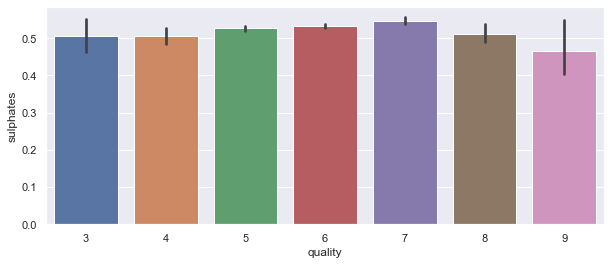

In [32]:
plt.figure(figsize=(10,4))
sns.barplot(x="quality", y="sulphates",   data=df )

The relationship with sulphates is strange, it increases as wine's quality gets higher (from 3 to 7), however, in case if quality values 8,9 it's lower

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

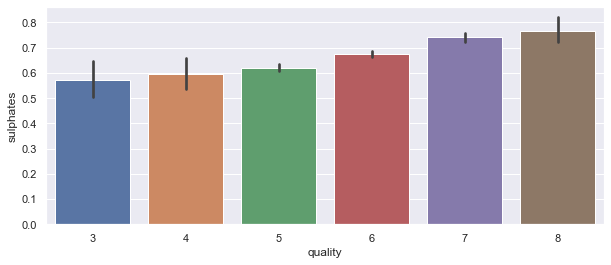

In [33]:
plt.figure(figsize=(10,4))
sns.barplot(x=df[df["type"]=="red"]["quality"], y=df[df["type"]=="red"]["sulphates"],   data=df )

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

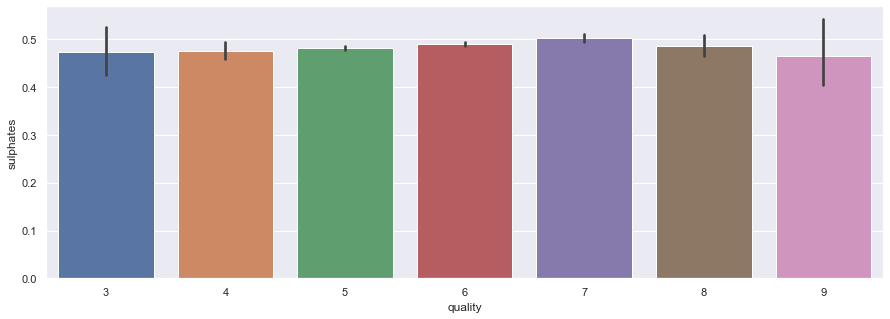

In [34]:
plt.figure(figsize=(15,5))
sns.barplot(x=df[df["type"]=="white"]["quality"], y=df[df["type"]=="white"]["sulphates"],   data=df )

we can see differences between the correlations of red and white wines, probably it makes sense separating them for modeling

Text(0, 0.5, 'sulphates')

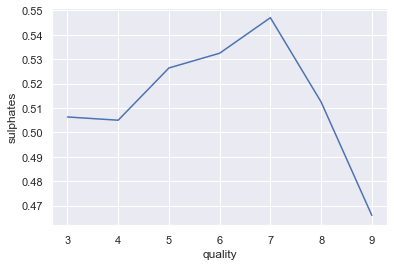

In [35]:
df.groupby('quality')['sulphates'].mean().plot.line()
plt.ylabel("sulphates")

### Check relationship between quality and alcohol

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

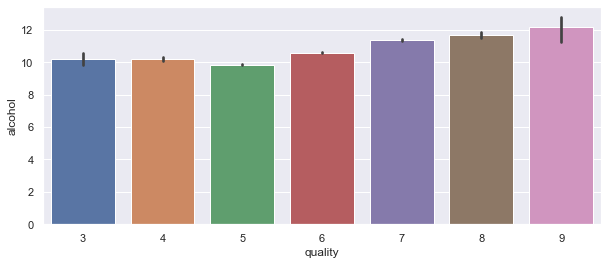

In [36]:
fig = plt.figure(figsize = (10,4))
sns.barplot(x = 'quality', y = 'alcohol', data = df)

In case of alcohol we see a positive correlation

### Check realtion between fixed acidity and pH

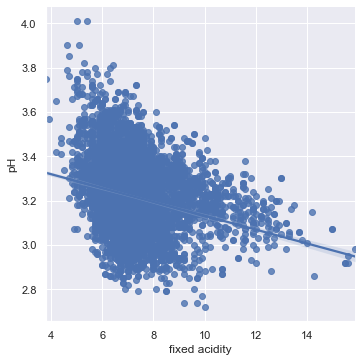

In [37]:
sns.lmplot(x="fixed acidity", y="pH", data=df)

### Check realtion between fixed acidity and citric acid

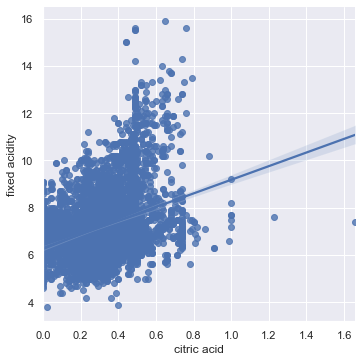

In [38]:
sns.lmplot(y="fixed acidity", x="citric acid", data=df)

### Domain knowledge
#### pH depends on acidity(fixed acidity, volatile acidity and cirtic acid)
#### And the best values of pH for wine quality are (3.2 - 3.4)
In addition, it is known from chemistry that how much higher the acidity as much lower the pH and vice versa.
It's also clear from 2 visualizations below.

Text(0, 0.5, 'fixed acidity')

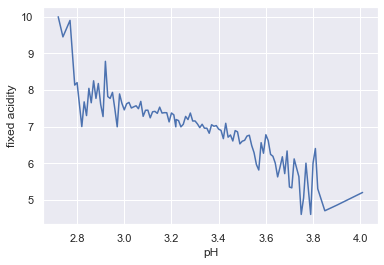

In [39]:
df.groupby('pH')['fixed acidity'].mean().plot.line()
plt.ylabel("fixed acidity")

Text(0, 0.5, 'citric acid')

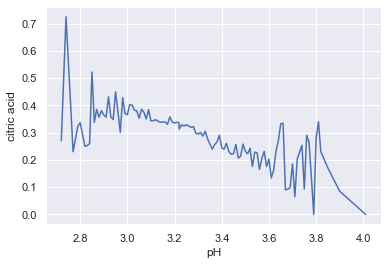

In [40]:
df.groupby('pH')['citric acid'].mean().plot.line()
plt.ylabel("citric acid")

Text(0, 0.5, 'volatile acidity')

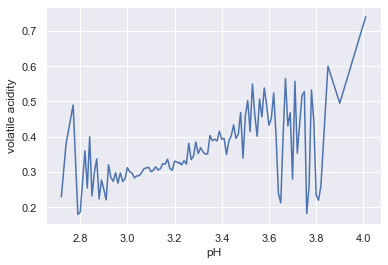

In [41]:
df.groupby('pH')['volatile acidity'].mean().plot.line()
plt.ylabel("volatile acidity")

So we can group these three values and use one(total acidity) instead of them

### Combining fixed acidity, volatile acidity and citric acid into one variable total_acidity

Text(0, 0.5, 'total_acidity')

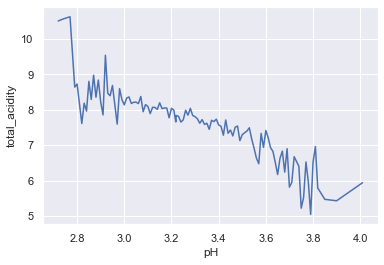

In [42]:
df["total_acidity"]= df['fixed acidity']+df['volatile acidity']+df['citric acid']
df.groupby('pH')['total_acidity'].mean().plot.line()
plt.ylabel("total_acidity")

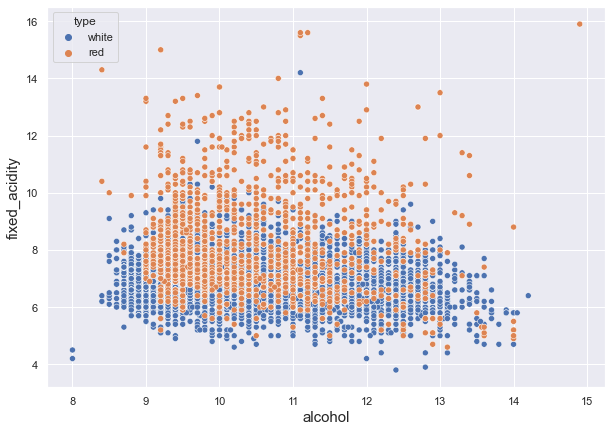

In [43]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="alcohol",y="fixed acidity",data=df, hue='type',marker= 'o',c="m")
plt.xlabel("alcohol",fontsize=15)
plt.ylabel("fixed_acidity",fontsize=15)
plt.show()

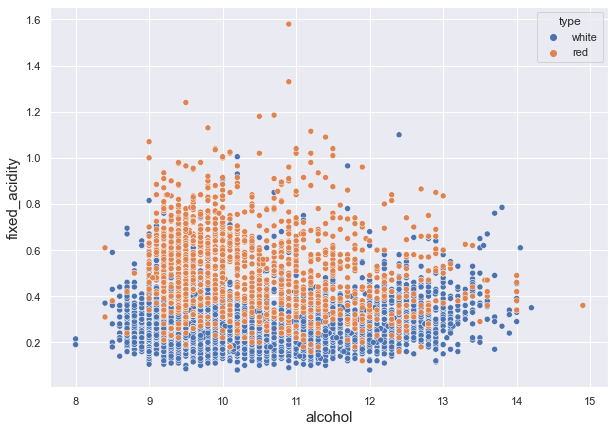

In [44]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="alcohol",y="volatile acidity",data=df, hue='type',marker= 'o',c="m")
plt.xlabel("alcohol",fontsize=15)
plt.ylabel("fixed_acidity",fontsize=15)
plt.show()

### From all this analyze we can see that there are some outliers. So we have 2 variants

<i>1. Remove this outliers.</i>

<i>2. Replace them with max/min values, so they may contain good values for other features and this variant will save their values</i>

### 1. Remove this outliers.

In [45]:
lower_limit = df["free sulfur dioxide"].mean() - 3*df["free sulfur dioxide"].std()
upper_limit = df["free sulfur dioxide"].mean() + 3*df["free sulfur dioxide"].std()
print(lower_limit,upper_limit)
df2 = df[(df["free sulfur dioxide"] > lower_limit) & (df["free sulfur dioxide"] < upper_limit)]
df.shape[0] - df2.shape[0]

-22.722879937833156 83.77351869418224


36

In [46]:
lower_limit = df2['total sulfur dioxide'].mean() - 3*df2['total sulfur dioxide'].std()
upper_limit = df2['total sulfur dioxide'].mean() + 3*df2['total sulfur dioxide'].std()
print(lower_limit,upper_limit)
df3 = df2[(df2['total sulfur dioxide'] > lower_limit) & (df2['total sulfur dioxide'] < upper_limit)]
df3.sample(5)

-53.15243132839596 283.65436601342924


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,total_acidity
894,white,5.8,0.26,0.18,1.2,0.031,40.0,114.0,0.99080,3.42,0.40,11.0,7,6.24
3412,white,6.8,0.24,0.29,9.5,0.042,56.0,157.0,0.99586,3.11,0.51,10.1,6,7.33
3944,white,6.1,0.27,0.32,6.2,0.048,47.0,161.0,0.99281,3.22,0.60,11.0,6,6.69
237,white,6.8,0.52,0.32,13.2,0.044,54.0,221.0,0.99720,3.27,0.50,9.6,6,7.64
2840,white,6.5,0.37,0.33,3.5,0.036,23.0,92.0,0.99136,3.18,0.38,11.2,6,7.20


In [47]:
df2.shape[0] - df3.shape[0]

5

In [48]:
lower_limit = df3['residual sugar'].mean() - 3*df3['residual sugar'].std()
upper_limit = df3['residual sugar'].mean() + 3*df3['residual sugar'].std()
print(lower_limit,upper_limit)
df4 = df3[(df3['residual sugar'] > lower_limit) & (df3['residual sugar'] < upper_limit)]
df4.sample(5)

-8.835863630876144 19.712440041288158


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,total_acidity
4903,red,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,8.06
662,white,7.0,0.57,0.10,8.3,0.094,23.0,188.0,0.9972,3.40,0.47,9.2,4,7.67
1898,white,7.2,0.31,0.41,8.6,0.053,15.0,89.0,0.9976,3.29,0.64,9.9,6,7.92
1069,white,6.9,0.20,0.36,1.5,0.031,38.0,147.0,0.9931,3.35,0.56,11.0,6,7.46
407,white,6.9,0.49,0.24,1.2,0.049,13.0,125.0,0.9932,3.17,0.51,9.4,5,7.63


In [49]:
df3.shape[0] - df4.shape[0]

26

In [50]:
df4.sample(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,total_acidity
345,white,7.1,0.145,0.33,4.6,0.050,33.0,131.0,0.99420,3.28,0.40,9.6,6,7.575
4279,white,6.2,0.240,0.27,16.8,0.040,48.0,129.0,0.99691,3.23,0.38,10.5,6,6.710
3631,white,6.6,0.300,0.25,8.0,0.036,21.0,124.0,0.99362,3.06,0.38,10.8,6,7.150
3364,white,6.0,0.200,0.26,1.1,0.033,38.0,67.0,0.98954,3.14,0.38,11.5,6,6.460
5955,red,7.6,0.420,0.25,3.9,0.104,28.0,90.0,0.99784,3.15,0.57,9.1,5,8.270


So our first dataframe is <b>df4</b>

### 2. Replace them with max/min values, so they may contain good values for other features and this variant will save their values

In [51]:
lower_limit = df["free sulfur dioxide"].mean() - 3*df["free sulfur dioxide"].std()
upper_limit = df["free sulfur dioxide"].mean() + 3*df["free sulfur dioxide"].std()
print(lower_limit,upper_limit)
df2_repl = df


def replace_outliers(arr):
    arr = np.array(arr)
    upper = arr.mean() + 3 * arr.std()
    lower = arr.mean() - 3 * arr.std()
    arr[(arr > upper)] = upper
    arr[(arr < lower)] = lower
    return arr


df2_repl["free sulfur dioxide"] = replace_outliers(df2_repl["free sulfur dioxide"])
df2_repl["total sulfur dioxide"] = replace_outliers(df2_repl["total sulfur dioxide"])
df2_repl["residual sugar"] = replace_outliers(df2_repl["residual sugar"])

lower_limit = df2_repl["free sulfur dioxide"].mean() - 3*df2_repl["free sulfur dioxide"].std()
upper_limit = df2_repl["free sulfur dioxide"].mean() + 3*df2_repl["free sulfur dioxide"].std()
print(lower_limit,upper_limit)

-22.722879937833156 83.77351869418224
-20.77329949410528 81.55479838364607


In this project we will use the first one, removing outliers.

But for the <b>next steps</b> it will be usefull to check how it works replacing them with max/min values.

### Count by quality

In [52]:
df4.quality.value_counts()

6    2806
5    2116
7    1075
4     214
8     189
3      25
9       5
Name: quality, dtype: int64

In [53]:
# Copy datasets for 2nd way testing
df4_v2 = df4.copy()
df2_repl_v2 = df2_repl.copy()

### 1. Let's combine our target variable into two classes: low quality (3-6) and high quality (7-9)

### 1.1 for df4 (Outliers removed)

In [54]:
quaity_mapping = { 3 : 0, 4 : 0, 5: 0, 6 : 0, 7: 1, 8 : 1, 9 : 1}
df4["quality"] =  df4["quality"].map(quaity_mapping)

<AxesSubplot:xlabel='quality', ylabel='count'>

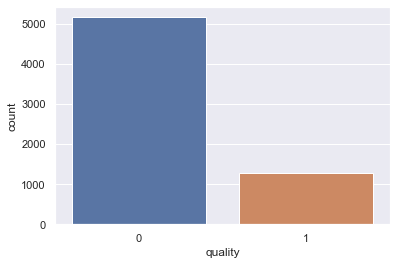

In [55]:
sns.countplot(df4['quality'])

We notice that there are fewer high quality wines in our database. And it will negatively affect the prediction. In the next steps we can increase the database by adding good quality wines. But that is in the <b>next steps</b>. Let's ignore that fact at this stage of the project.

In [56]:
df4.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,total_acidity
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0,6.94
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0,8.78
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0,7.75
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0,7.75
5,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0,8.78


For the <b>next steps</b> we also can combine our target variable into three classes: Low, Medium and High

quality_mapping = {3: "Low", 4: "Low", 5: "Medium", 6: "Medium", 7:"Medium", 8: "High", 9: "High"}

df4['quality'] = df4['quality'].map(quality_mapping)

quality_mapping = {"Low": 0, "Medium": 1, "High": 2}

df4['quality'] = df4['quality'].map(quality_mapping)

df4.quality.value_counts()

<b>In addition, we see from this whole analysis that red and white wines have different characteristics, and wine characterization parameters affect the quality of the wine differently depending on its color. Therefore, in our opinion, it is not very sensible to run the models on the basis of simultaneous white and red wines.</b>

So we will get prediction only for red wine to show how it works. But please note that the same can be done for white wine by changing the settings accordingly.

### 1.2 for df2_repl (Outliers replaced with mean values)

In [57]:
quaity_mapping = { 3 : 0, 4 : 0, 5: 0, 6 : 0, 7: 1, 8 : 1, 9 : 1}
df2_repl["quality"] =  df2_repl["quality"].map(quaity_mapping)

<AxesSubplot:xlabel='quality', ylabel='count'>

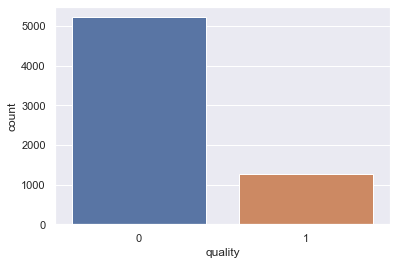

In [58]:
sns.countplot(df2_repl['quality'])

In [59]:
df2_repl.head(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,total_acidity
0,white,7.0,0.27,0.36,19.715405,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0,7.63
1,white,6.3,0.30,0.34,1.600000,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0,6.94
2,white,8.1,0.28,0.40,6.900000,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0,8.78
3,white,7.2,0.23,0.32,8.500000,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0,7.75
4,white,7.2,0.23,0.32,8.500000,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0,7.75


In [60]:
df2_repl.quality.value_counts()

0    5220
1    1277
Name: quality, dtype: int64

### 2. Combine our target variable into three classes: low quality (3, 4) , medium quality (5, 6, 7) and high quality (8,9)

### 2.1 for df4 (Outliers removed)

In [61]:
quality_mapping2 = {3: "Low", 4: "Low", 5: "Medium", 6: "Medium", 7:"Medium", 8: "High", 9: "High"}
df4_v2['quality'] = df4_v2['quality'].map(quality_mapping2)
df4_v2.quality.value_counts()

Medium    5997
Low        239
High       194
Name: quality, dtype: int64

In [62]:
quality_mapping = {"Low": 0, "Medium": 1, "High": 2}
df4_v2['quality'] = df4_v2['quality'].map(quality_mapping)
df4_v2.quality.value_counts()

1    5997
0     239
2     194
Name: quality, dtype: int64

In [63]:
df4_v2.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,total_acidity
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1,6.94
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1,8.78
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,7.75
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,7.75
5,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1,8.78


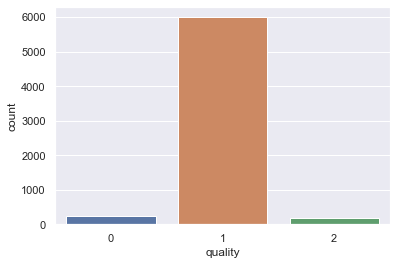

In [64]:
sns.countplot(df4_v2['quality']);

### 2.2 for df2_repl (Outliers replaced with mean values)

In [65]:
quality_mapping2 = {3: "Low", 4: "Low", 5: "Medium", 6: "Medium", 7:"Medium", 8: "High", 9: "High"}
df2_repl_v2['quality'] = df2_repl_v2['quality'].map(quality_mapping2)
df2_repl_v2.quality.value_counts()

Medium    6053
Low        246
High       198
Name: quality, dtype: int64

In [66]:
quality_mapping = {"Low": 0, "Medium": 1, "High": 2}
df2_repl_v2['quality'] = df2_repl_v2['quality'].map(quality_mapping)
df2_repl_v2.quality.value_counts()

1    6053
0     246
2     198
Name: quality, dtype: int64

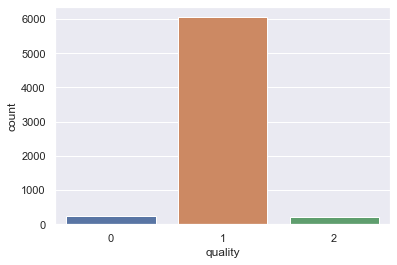

In [67]:
sns.countplot(df2_repl_v2['quality']);

In [68]:
df2_repl_v2.head(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,total_acidity
0,white,7.0,0.27,0.36,19.715405,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1,7.63
1,white,6.3,0.30,0.34,1.600000,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1,6.94
2,white,8.1,0.28,0.40,6.900000,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1,8.78
3,white,7.2,0.23,0.32,8.500000,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,7.75
4,white,7.2,0.23,0.32,8.500000,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,7.75


In [69]:
df2_repl_v2.quality.value_counts()

1    6053
0     246
2     198
Name: quality, dtype: int64

## Now we have 4 datasets for modeling
#### 1.1) df4 (where outliers removed, quality scaled to 2 types)
#### 1.2) df2_repl (where outliers replaced with mean values, quality scaled to 2 types)
#### 2.1) df4_v2 (where outliers replaced with mean values, quality scaled to 3 types)
#### 2.2) df2_repl_v2 (where outliers replaced with mean values, quality scaled to 3 types)